# Coinlore Cryptocurrency Data Scraper: Extract, Transform, and Export

This project involves creating a Python-based scraper that extracts cryptocurrency data from the [Coinlore API](https://www.coinlore.com/cryptocurrency-data-api#global) and exports it to Excel and CSV files for further analysis. The scraper is designed to provide a comprehensive view of various cryptocurrencies, capturing key metrics such as price, market cap, and trading volume. 

## Data Extraction
The scraper sends requests to the Coinlore API to retrieve cryptocurrency data. It processes the JSON response to extract relevant data points. The extracted data is organized into a pandas DataFrame, making it easy to manipulate and analyze. The DataFrame includes columns for each data point provided by the API.

In [16]:
# Imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Site to scrape (first 100 coins)
BASE_URL = 'https://api.coinlore.net/api/tickers/'

# Device scraping details
# Received from https://www.whatismybrowser.com 
USER_AGENT = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36 OPR/117.0.0.0' 
REQUEST_HEADER = {
    'User-Agent': USER_AGENT,
    'Accept-Language': 'en-US, en;q=0.5'
}

# Scrape site for cryptocurrencies
def get_data():
    res = requests.get(url=BASE_URL, headers=REQUEST_HEADER)
    return res.json()

# Extract data
scraped_data = get_data()

# Convert to DataFrame
df = pd.DataFrame(scraped_data['data'])

# Display the DataFrame
df.head()

,id,symbol,name,nameid,rank,price_usd,percent_change_24h,percent_change_1h,percent_change_7d,price_btc,market_cap_usd,volume24,volume24a,csupply,tsupply,msupply
0,90,BTC,Bitcoin,bitcoin,1,83714.67,-1.98,0.01,-0.19,1.00,1661105111817.30,2.584365e+10,2.596941e+10,19842462.00,19842462,21000000
1,80,ETH,Ethereum,ethereum,2,1880.26,-1.83,0.08,-4.73,0.022459,226521042282.39,1.137378e+10,1.211162e+10,120473321.00,122375302,
2,518,USDT,Tether,tether,3,1.01,0.43,-0.16,0.19,0.000012,140086894935.40,4.748903e+10,5.045190e+10,139329876218.00,141572991338.46,
3,58,XRP,XRP,ripple,4,2.12,-5.09,0.02,-11.35,0.000025,122429487358.83,3.085800e+09,2.513272e+09,57641211234.00,99986586496,100000000000
4,2710,BNB,Binance Coin,binance-coin,5,607.75,-3.61,0.35,-4.13,0.007259,101373330941.67,8.536220e+08,1.522510e+09,166801148.00,192443301,200000000


## Data Preprocessing

The extracted data is processed to remove any missing values and unnecessary columns or rows, enhancing its usability for the end user.

In [17]:
# Check missing values
print("\nMissing values: ")
print(df.isna().sum())


Missing values: 
id                    0
symbol                0
name                  0
nameid                0
rank                  0
price_usd             0
percent_change_24h    0
percent_change_1h     0
percent_change_7d     0
price_btc             0
market_cap_usd        0
volume24              0
volume24a             0
csupply               0
tsupply               1
msupply               9
dtype: int64


In [18]:
# Remove missing values
df.fillna("", inplace=True) # replace NaN with empty spaces
df.drop("msupply", axis=1, inplace=True) # too many missing values to impute meaning
print("\nMissing values: ")
print(df.isna().sum())


Missing values: 
id                    0
symbol                0
name                  0
nameid                0
rank                  0
price_usd             0
percent_change_24h    0
percent_change_1h     0
percent_change_7d     0
price_btc             0
market_cap_usd        0
volume24              0
volume24a             0
csupply               0
tsupply               0
dtype: int64


In [19]:
# Drop redundant columns
df.drop(['id', 'nameid'], axis=1, inplace=True)
df.head()

,symbol,name,rank,price_usd,percent_change_24h,percent_change_1h,percent_change_7d,price_btc,market_cap_usd,volume24,volume24a,csupply,tsupply
0,BTC,Bitcoin,1,83714.67,-1.98,0.01,-0.19,1.00,1661105111817.30,2.584365e+10,2.596941e+10,19842462.00,19842462
1,ETH,Ethereum,2,1880.26,-1.83,0.08,-4.73,0.022459,226521042282.39,1.137378e+10,1.211162e+10,120473321.00,122375302
2,USDT,Tether,3,1.01,0.43,-0.16,0.19,0.000012,140086894935.40,4.748903e+10,5.045190e+10,139329876218.00,141572991338.46
3,XRP,XRP,4,2.12,-5.09,0.02,-11.35,0.000025,122429487358.83,3.085800e+09,2.513272e+09,57641211234.00,99986586496
4,BNB,Binance Coin,5,607.75,-3.61,0.35,-4.13,0.007259,101373330941.67,8.536220e+08,1.522510e+09,166801148.00,192443301


In [ ]:
# Rename columns
df.columns = df.columns.str.capitalize()
df.rename({"Price_usd": "Price (USD)", "Percent_change_24h": "Percent Change (24h)", "Percent_change_1h": "Percent Change (1h)", "Percent_change_7d": "Percent Change (7 days)", "Price_btc": "Price (Bitcoin)", "Market_cap_usd": "Market Cap (USD)", "Volume24": "Trading Volume (24h)", "Volume24a": "Adjusted Volume (24h)", "Csupply": "Circulating Supply", "Tsupply": "Total Supply"}, axis=1, inplace=True)
df.head()

,Symbol,Name,Rank,Price (USD),Percent Change (24h),Percent Change (1h),Percent Change (7 days),Price (Bitcoin),Market Cap (USD),Trading Volume (24h),Adjusted Volume (24h),Circulating Supply,Total Supply
0,BTC,Bitcoin,1,83714.67,-1.98,0.01,-0.19,1.00,1661105111817.30,2.584365e+10,2.596941e+10,19842462.00,19842462
1,ETH,Ethereum,2,1880.26,-1.83,0.08,-4.73,0.022459,226521042282.39,1.137378e+10,1.211162e+10,120473321.00,122375302
2,USDT,Tether,3,1.01,0.43,-0.16,0.19,0.000012,140086894935.40,4.748903e+10,5.045190e+10,139329876218.00,141572991338.46
3,XRP,XRP,4,2.12,-5.09,0.02,-11.35,0.000025,122429487358.83,3.085800e+09,2.513272e+09,57641211234.00,99986586496
4,BNB,Binance Coin,5,607.75,-3.61,0.35,-4.13,0.007259,101373330941.67,8.536220e+08,1.522510e+09,166801148.00,192443301


#### Visualization for usability testing

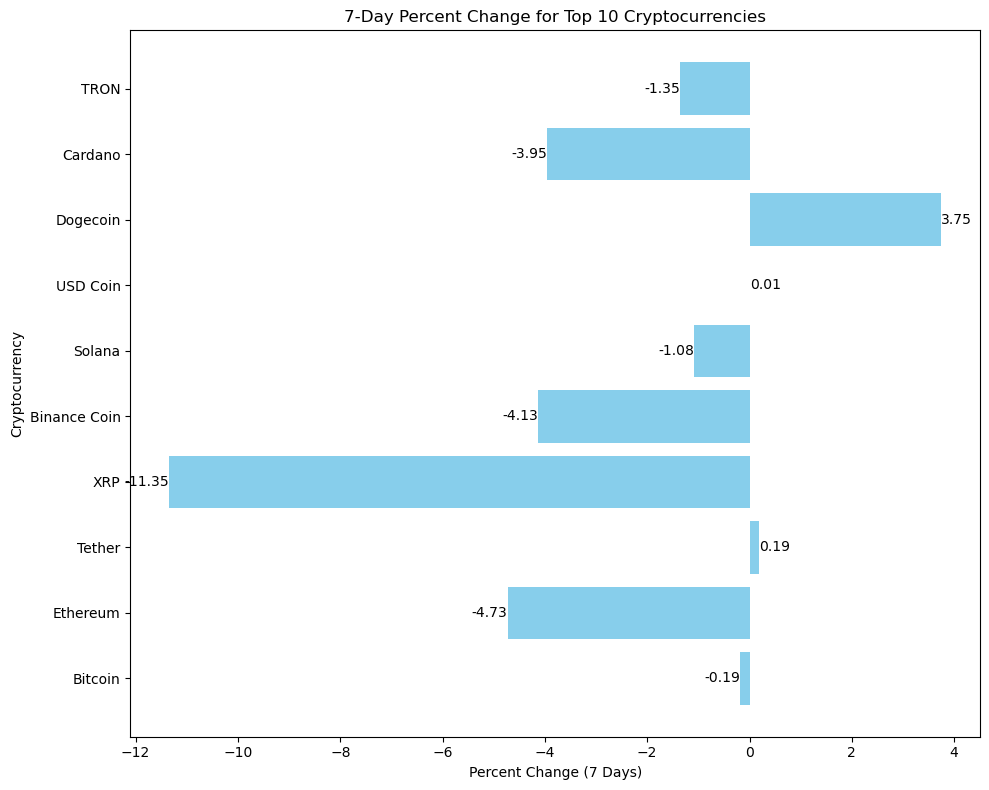

In [21]:
# Filter top 10 cryptocurrencies by rank
df['Percent Change (7 days)'] = pd.to_numeric(df['Percent Change (7 days)'], errors='coerce')
top_10 = df.sort_values(by='Rank').head(10)

# Plotting
plt.figure(figsize=(10, 8))
bplot = plt.barh(top_10['Name'], top_10['Percent Change (7 days)'], color='skyblue')
plt.ylabel('Cryptocurrency')
plt.xlabel('Percent Change (7 Days)')
plt.title('7-Day Percent Change for Top 10 Cryptocurrencies')
plt.tight_layout()
plt.bar_label(bplot)
plt.show()

## Data Exporting

The processed data is exported to both Excel and CSV formats. This allows analysts to perform further analysis using spreadsheet software or import the data into other analytical tools.

In [22]:
# File names
csv_file = 'crypto_data.csv'
excel_file = 'crypto_data.xlsx'

# Export to CSV
try:
    df.to_csv(csv_file, index=False)
    print(f"Data exported to {csv_file}")
except PermissionError as e:
    print(f"Permission error while writing to {csv_file}: {e}")

# Export to Excel
try:
    df.to_excel(excel_file, index=False, sheet_name='Top 100 Data')
    print(f"Data exported to {excel_file}")
except PermissionError as e:
    print(f"Permission error while writing to {excel_file}: {e}")

Data exported to crypto_data.csv
Data exported to crypto_data.xlsx
